# Multi-variable dynamical systems

In the examples we've seen so far, the **state** of a simple neuron is defined by the value of its membrane potential $V$; the state of a population of bacteria is defined by the number of bacteria, etc. In each case, a single number.

However, most physical systems are defined by multiple variables. In physics, position and velocity are both needed to describe a system of particles. In ecology, multiple populations interact together.

## Linear case: dynamics of love affairs
This section is heavily inspired to S. Strogatz's wonderful textbook *Nonlinear Dynamics and Chaos*.

Imagine two lovers, say Romeo and Juliet. Let's say that $R$ is the variable that describes Romeo's love (or hate, if negative) for Juliet; and $J$ describes Juliet's love for Romeo.

In the first case, we imagine the two lovers with two incompatible dating behaviours:
- Juliet is a fickle lover. The more Romeo loves her, the more Juliet wants to run away and hide. But when Romeo gets discouraged and backs off, Juliet begins to find him strangely attractive.
- Romeo, on the other hand, tends to echo her feelings: he warms up when she loves him, and grows cold when she hates him.

*What do you think will be the outcome of this situation?*

So we describe their loves evolving in time based on each other:

$$  \dot R(t) = a J(t) $$
$$  \dot J(t) = -b R(t) $$

These are also differential equations, but there's **two** interacting with each other (a **system** of equations).

Notice that we can write this also as
$$ \begin{pmatrix} \dot R \\ \dot J \end{pmatrix} = \begin{pmatrix} 0 & a \\ -b & 0 \end{pmatrix} \begin{pmatrix}  R \\ J \end{pmatrix} $$

which makes it easier to work with in the general case, because we can set $y = (R, J)$, put the parameters in a matrix $A$, and write it as a matrix multiplication, as if it were a single variable:
$$ \mathbf{\dot y} = A \mathbf{y} $$

### Let's code it up!
We begin in the same way as we did for one variable.

In [5]:
import numpy as np

# Define a few constants
dt = 0.001 # we just choose a small number
Tmax = 10 # max time

# time goes from 0 to Tmax with increments of dt
times = np.arange(0, Tmax, dt)

a = 0.5
b = 1.5

A = np.array([[0, a], [-b, 0]])
y0 = np.array([1., 1.])  # the initial love values

In [8]:
def simulate(A, y0):
    # just a placeholder
    y = np.empty((len(times), 2))  # the second dimension is 2 (J and R)
    y[0] = y0

    for i in range(len(times) - 1):
        # the actual equation
        y[i+1] = y[i] + dt * A @ y[i]
        
    return y

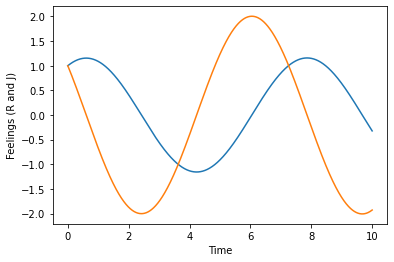

In [9]:
import matplotlib.pyplot as plt

y = simulate(A, y0)

plt.plot(times, y)
plt.xlabel("Time")
plt.ylabel("Feelings (R and J)");

### Phase spaces
But now, why don't we plot $J$ vs $R$? We don't need *time* to understand the dynamics!
The space of **states**, which here are the $(R, J)$ vectors, is called **phase space**.
We see the **trajectories** of states in the state space, so the dynamics itself!

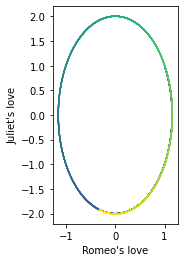

In [10]:
def plot_trajectory(A, y0):
    y = simulate(A, np.asarray(y0))
    R = y[:, 0]
    J = y[:, 1]

    plt.scatter(R, J, c=times, s=0.1)

    plt.gca().set_aspect('equal')
    plt.xlabel("Romeo's love")
    plt.ylabel("Juliet's love");
    
plot_trajectory(A, y0)

- What are we seeing here? How do we interpret this plot?
- If we change the initial condition `y0`, what happens?

### Flow fields

What if we could plot all different trajectories in phase space, for all possible values of `y0` at once?

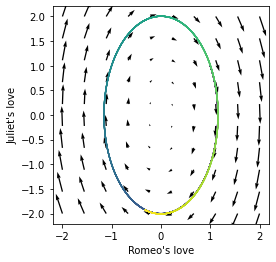

In [11]:
def plot_flow(A):
    vals = np.linspace(-2, 2, 10)
    y_vector_field = np.array(np.meshgrid(vals, vals))
    ydot_vector_field = np.inner(y_vector_field.T, A).T

    plt.quiver(*y_vector_field, *ydot_vector_field)
    plt.gca().set_aspect('equal')

    
plot_flow(A)
plot_trajectory(A, y0)

#### Experiment on all this
- Go back to the beginning and try changing $a$ and $b$. What happens?
- How do we interpret all this?
- Are there any equilibrium points in this system?

## Generalized love stories

But then, we can think of a generalized two-variable system:

$$ \begin{pmatrix} \dot R \\ \dot J \end{pmatrix} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix}  R \\ J \end{pmatrix} $$

*What's the meaning of each parameter here?*

### Cautious lovers who respond to each other
- Using the code above, try looking at what happens when both Romeo and Juliet respond to each other's advances ($b=c=+1$) but are a bit "cautious" ($a=d=-0.5$).
- What is the outcome of this situation? Describe it in terms of stable and unstable equilibria.

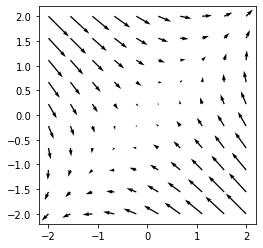

In [66]:
A = np.array([
    [-.5, 1],
    [1, -.5]
])

plot_flow(A)

### Very cautious lovers
- Using the code above, try looking at what happens when both Romeo and Juliet respond to each other's advances ($b=c=+1$) but are but are **very** "cautious" ($a=d=-2$).
- What is the outcome of this situation? Describe it in terms of stable and unstable equilibria.
- **New**: Try looking at the outcome for different $y_0$ to see if your interpretation is right

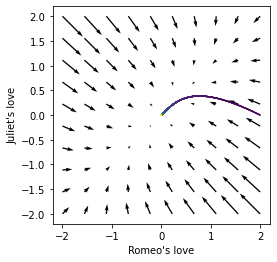

In [67]:
A = np.array([
    [-2, 1],
    [1, -2]
])

plot_flow(A)
plot_trajectory(A, (2, 0))

### Fickle Juliet, both cautious
- Try looking at what happens when both Romeo and Juliet are a bit "cautious" ($a=d=-0.5$), Romeo responds to Juliet's love ($b=1$), but Juliet acts fickle as we described in the first example ($c=-1$).
- What is the outcome of this situation? Describe it in terms of stable and unstable equilibria.
- Try looking at the outcome for different $y_0$ to see if your interpretation is right

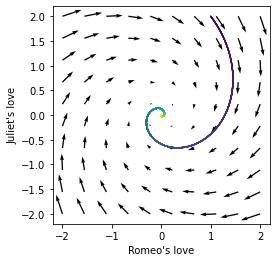

In [68]:
A = np.array([
    [-0.5, 1],
    [-1, -0.5]
])

plot_flow(A)
plot_trajectory(A, (1, 2))

# A neuroscience example: the Wilson-Cowan model

In this case, let's consider the activity of two neuron populations: one inhibitory, one excitatory. We work with their firing rates averaged over some short time span, calling the two variables $E(t)$ (excitatory activity) and $I(t)$ (inhibitory activity). We can put them together in a vector $\mathbf{y} = (E, I)$. Then

$$\mathbf{\dot y} = -\mathbf{y} + (1-r\mathbf{y})\cdot S\left(A\mathbf{y} + i\right) $$

Let's break this down:
- The $-\mathbf{y}$ term means "the activity tends to die out on its own".
- The term $A\mathbf{y} + i$ is the input to the two populations, which depends on:
    - recurrent input: the activity itself, multiplied by the synaptic weights in $A$
    - the external input $i$
- $S$ is a nonlinear function, that shows neurons respond non-linearly to their input
- The term $(1-r\mathbf{y})$ tells us that neurons have a refractory period, and cannot fire with rates above a certain value $1/r$.

### Defining parameters

In [69]:
# couplings
a = 16
b = 12
c = 15
d = 3

# refractory periods
rE = 1
rI = 1
r = 1

# external inputs
inpt = 1

# simulation time
time = np.linspace(0, 50, 1000)

### Defining the functions and equations

Here, we 

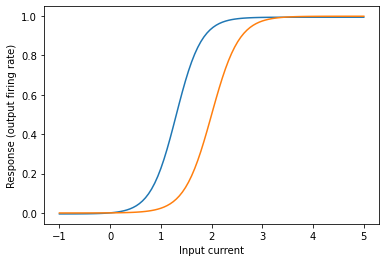

In [71]:
# nonlinear functions
from scipy.special import expit

# the excitat
def exc_response(x):
    return expit(4*(x-1.3)) - 0.00549

def inh_response(x):
    return expit(3.7*(x-2)) - 0.00061


# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def WilsonCowan(y, t):
    E = y[0]
    I = y[1]
    y1 = -E + (1 - r * E) * exc_response(a * E - b * I + inpt)
    y2 = -I + (1 - r * I) * inh_response(c * E - d * I + inpt)
    return [y1, y2]

# plot just to show how they look
x = np.linspace(-1, 5, 100)
plt.plot(x, exc_response(x), label="Exc response function")
plt.plot(x, inh_response(x), label="Inh response function")
plt.xlabel("Input current")
plt.ylabel("Response (output firing rate)");

In [41]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint

def find_flow_field():
    # minimum and maximum E and I values we want displayed in the graph
    minval = -.1
    maxval = .6
    resolution = 20

    # State variables
    vals = np.linspace(minval, maxval, resolution)

    # Create a grid for evaluation of the vector field
    E_vals, I_vals = np.meshgrid(vals, vals)

    # Evaluate the derivatives
    E_dot, I_dot = WilsonCowan([E_vals, I_vals], 0)
    
    return E_dot, I_dot

def find_fixed_points():
    fixed_p = []
    y1 = E_vals.ravel()
    y2 = I_vals.ravel()
    for i in range(resolution**2):
        # find a zero
        sol, infodict, ier, mesg = fsolve(
            WilsonCowan, [y1[i], y2[i]], args=(0), full_output=1)
        if ier == 1: # I exclude the cases where fsolve didn't converge
            fixed_p.append(sol)

    return np.array(fixed_p).T

def solve_eq_diffs(E0, I0, time):  # the inputs are the starting points
    # find the solution with scint.odeint
    odesol = odeint(WilsonCowan, [E0, I0], time)
    # separate the two solutions
    exc_timeseries, inh_timeseries = odesol.T
    return exc_timeseries, inh_timeseries

## Finding a solution given initial conditions

In [55]:
# initial conditions
E0, I0 = 0.39, 0.49 # try changing this

exc_timeseries, inh_timeseries = solve_eq_diffs(E0, I0, time)

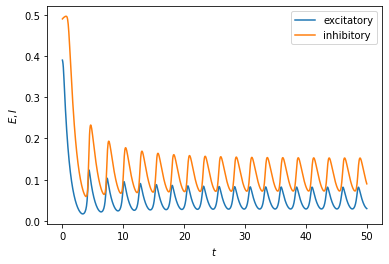

In [56]:
import matplotlib.pyplot as plt

# plot the solution in time
plt.ylabel(r'$E, I$')
plt.xlabel(r'$t$')
plt.plot(time, exc_timeseries, '-', label="excitatory");
plt.plot(time, inh_timeseries, '-', label="inhibitory");
plt.legend();

### Exercise

- What do we see here? What is the neural network doing?
- Try changing the initial conditions `E0, I0`. Can you get it to have a different behavior?

## Plotting the phase portrait

Let's now compute the whole flow field and show it in phase space.

Additionally, we can use a numerical equation solver to find the equilibrium points.

In [57]:
# compute the vector field corresponding to the equation
E_dot, I_dot = find_flow_field()

# numerically find the fixed points of this field
fixed_p = find_fixed_points()

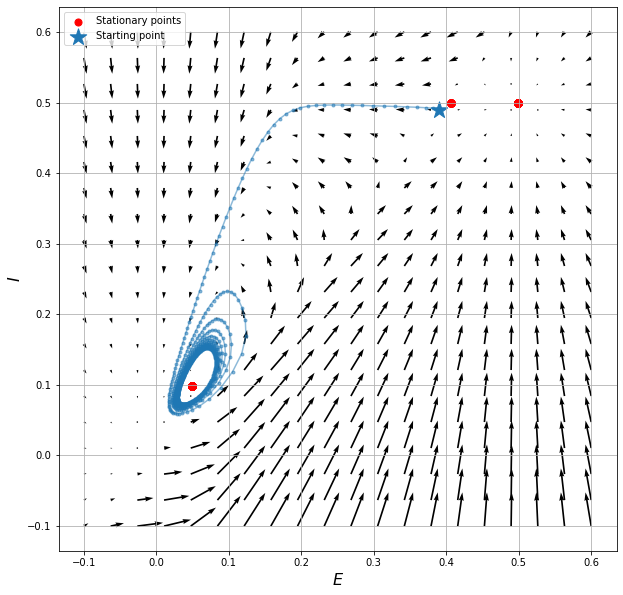

In [59]:
# plotting the vector field in the state space (E, I)
plt.figure(figsize=(10, 10))
plt.quiver(E_vals, I_vals, E_dot, I_dot)
plt.xlabel(r'$E$', fontsize=16) # yes, you can use Latex code!
plt.ylabel(r'$I$', fontsize=16)
plt.grid()

# plot the solution in the phase space
plt.plot(exc_timeseries, inh_timeseries, '.-', alpha=0.5);

# plot the fixed points we identified
plt.scatter(fixed_p[0], fixed_p[1], marker='o', s=50, c='r',
            label="Stationary points")

# plot the starting point
plt.scatter(E0, I0, marker='*', s=300, label="Starting point")
plt.legend(loc="upper left");

### Final considerations

What do we observe? Equilibrium points? Stable or unstable? Limit cycles? What do we conclude?

# Exercise for another time: prey-predator model
Let us extend our example of the logistic equation to multiple populations. This was the equation we used so far:
$$ \frac{dy(t)}{dt} = ky(t)\cdot (M - y(t)) = kMy - ky^2 $$

But let's think of this as a population of preys (for example, zebras). The limiting factor, in this case, is due to a population of predators (lions).
$$ \frac{dZ(t)}{dt} = rZ(t) - aZ(t)L(t)$$
$$ \frac{dL(t)}{dt} = -mZ(t) + bZ(t)L(t)$$
We should interpret these terms as follows:
- The Zebras reproduce at rate $r$ in absence of lions
- The Lions dwindle with mortality $m$ in absence of zebras
- The Zebras tend to die more in presence of lions (by a factor $a$)
- The Lions tend to reproduce more in presence of zebras (by a factor $b$).

These are called **Lotka-Volterra equations** and are often used as an example of a system with richer dynamics.

Exercise: plot the phase portrait and interpret it.